## K-means clustering with the Wine dataset

In [1]:
## These packages are always useful to import when working with data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Get the data

In this Notebook we use the data in the Wine dataset from SKLearn. This data has several columns that each describe a different characteristic of 178 different wines. The wines have been sampled from three distinct cultivators and we might expect that each cultivator produces wines with different characteristics.

In [2]:
## Import the Wine dataset fro sklearn
from sklearn.datasets import load_wine
wine_bunch = load_wine()
wine = pd.DataFrame(wine_bunch.data)

## Use the feature_names attribute to give sensible column headings
col_names = list(wine_bunch.feature_names)
col_names[11] = 'od280_od315'
wine.columns = col_names

## For this clustering exercise we will also have the 'real' clusters on our dataframe
wine['real_classes'] = wine_bunch.target

wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280_od315,proline,real_classes
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [3]:
## The DESCR attribute contains useful contextual information about the data)
print(wine_bunch.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

## Data exploration

Before starting to create clusters from the data, we must first check the data for cleanliness, outliers, etc. We should also take some time to explore the relationships between each of the variables and develop an understanding for the range of values and distribution for each one.

In [4]:
## The .describe method provides basic summary statistics for every numeric variable
wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280_od315,proline,real_classes
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [5]:
## We might want to double-check that we have three distinct values in 'real_classes'
## Corresponding to one value per cultivator
wine['real_classes'].unique()

array([0, 1, 2])

### Simple pair-plot

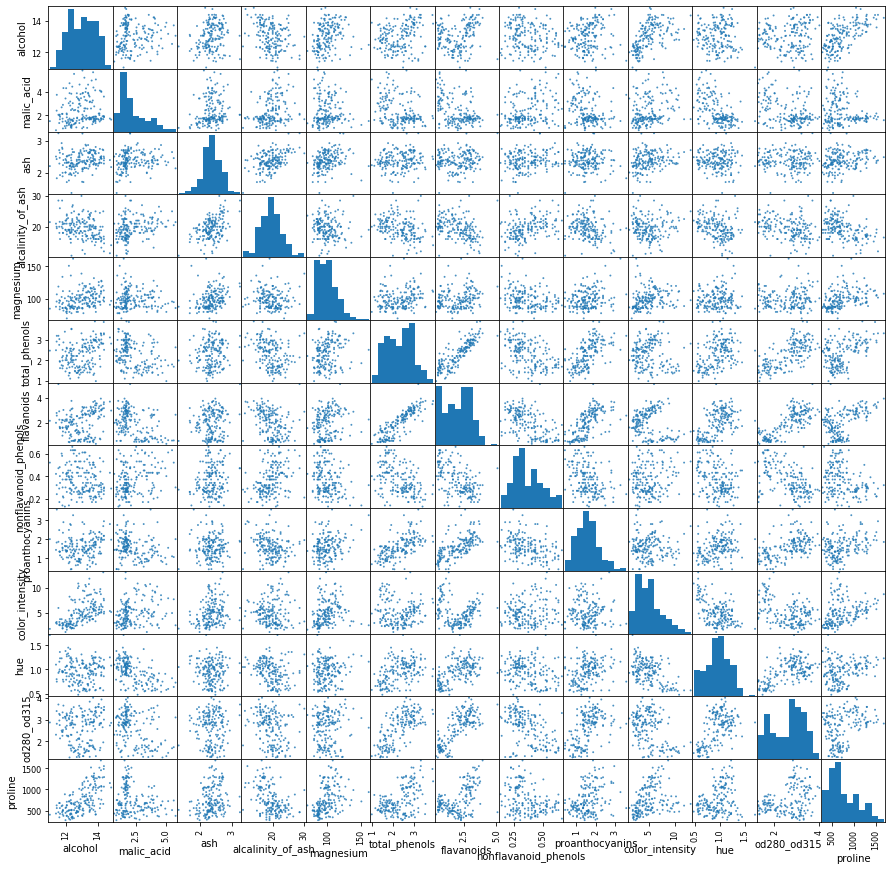

In [6]:
## To save computing power we might want to only plot a few of the variables at a time
#g = pd.plotting.scatter_matrix(wine[['alcohol','malic_acid','ash']],
#                               figsize=(15,15),
#                               marker = '.',
#                               s = 15,
#                               alpha = 0.8)

## Or we could go ahead and plot all 13 attributes at once...
g = pd.plotting.scatter_matrix(wine.drop('real_classes',1), # we don't want to visualise the 'real_classes' variable
                               figsize=(15,15),             # This determines the size of our graphic
                               marker = '.',                # This tells us that we want each datapoint represented by a '.'
                               s = 15,                      # This determines the size of each '.'
                               alpha = 0.8)                 # This affects the opacity of each '.'
plt.show()

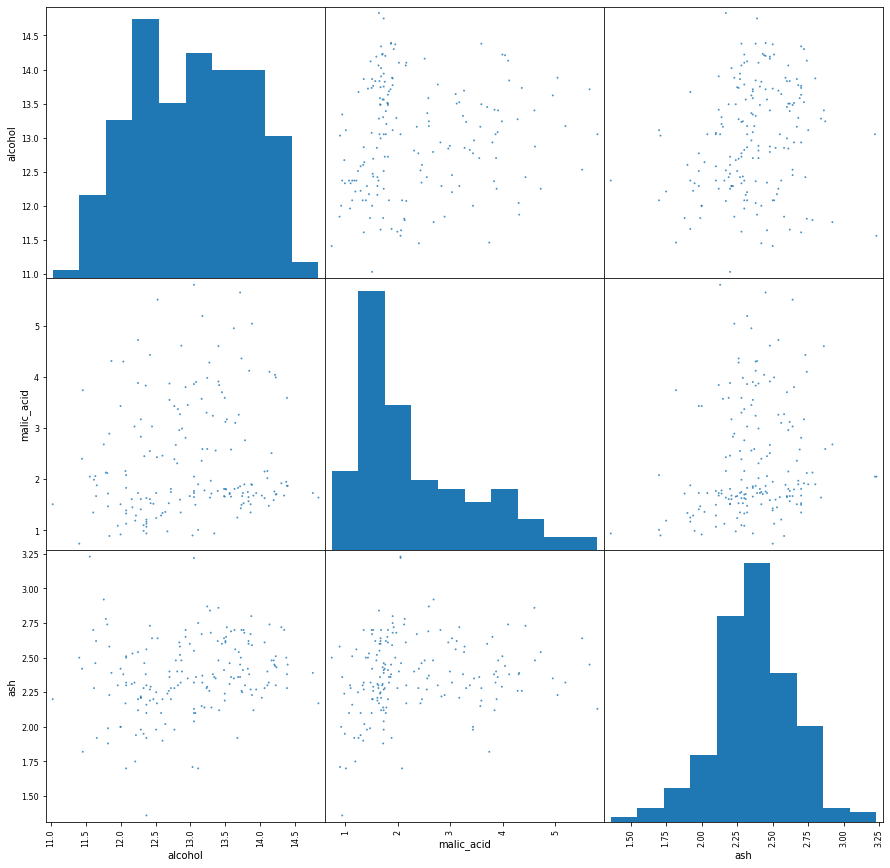

In [7]:
## To save computing power we might want to only plot a few of the variables at a time
g = pd.plotting.scatter_matrix(wine[['alcohol','malic_acid','ash']],
                               figsize=(15,15),
                               marker = '.',
                               s = 15,
                               alpha = 0.8)
## Or we could go ahead and plot all 13 attributes at once...
#g = pd.plotting.scatter_matrix(wine.drop('real_classes',1), # we don't want to visualise the 'real_classes' variable
#                               figsize=(15,15),             # This determines the size of our graphic
#                               marker = '.',                # This tells us that we want each datapoint represented by a '.'
#                               s = 15,                      # This determines the size of each '.'
                               #alpha = 0.8)                 # This affects the opacity of each '.'
plt.show()

## Building our first K-means clusters

Let's start by trying to divide the data into 2 clusters even though we know that there are actually three clusters. Normally, when we conduct clustering projects we do not know the right answer before we start.

First we will import the KMeans function from sklearn. Then we use it to cluster the data using all 13 attrbiutes provided in the wine dataset.

In [8]:
from sklearn.cluster import KMeans

## Fitting k-means clusters is simple - we only need one line of code
kmeans1 = KMeans(n_clusters=2, random_state=3).fit(wine.drop('real_classes', 1))

## The resulting kmeans1 object has centroid values...
centroids1 = kmeans1.cluster_centers_

## And it has an array of labels, one for each datapoint.
labels1 = kmeans1.labels_

## We can use these labels to create a new column in our original dataset:
wine['kmeans1'] = labels1

#### Cluster centroids
Let's have a look at the centroids of the clusters and also the mean values of each attribute by cluster. We should get the same answers.

In [9]:
centroids1

array([[1.27028455e+01, 2.54455285e+00, 2.33910569e+00, 2.04081301e+01,
        9.68130081e+01, 2.06211382e+00, 1.64146341e+00, 3.92682927e-01,
        1.45406504e+00, 4.85138211e+00, 9.08617886e-01, 2.40821138e+00,
        5.65869919e+02],
       [1.36665455e+01, 1.87072727e+00, 2.42781818e+00, 1.74527273e+01,
        1.06290909e+02, 2.81618182e+00, 2.89654545e+00, 2.92909091e-01,
        1.89690909e+00, 5.52036364e+00, 1.06665455e+00, 3.06672727e+00,
        1.15172727e+03]])

In [10]:
wine.groupby('kmeans1').mean()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280_od315,proline,real_classes
kmeans1,,,,,,,,,,,,,,
0,12.702846,2.544553,2.339106,20.408130,96.813008,2.062114,1.641463,0.392683,1.454065,4.851382,0.908618,2.408211,565.869919,1.308943
1,13.666545,1.870727,2.427818,17.452727,106.290909,2.816182,2.896545,0.292909,1.896909,5.520364,1.066655,3.066727,1151.727273,0.109091


How well does the classification provided by the clustering algorithm match the real classes? It looks like the algorithm did a fairly good job of identifying which datapoints belong to 'Class 1' and which datapoints belong to either 'Class 2' or 'Class 3'.

In [11]:
wine.groupby(['real_classes','kmeans1'])['real_classes'].count()

real_classes  kmeans1
0             0           9
              1          50
1             0          67
              1           4
2             0          47
              1           1
Name: real_classes, dtype: int64

## Visualise our first clustering solution with a pair-plot

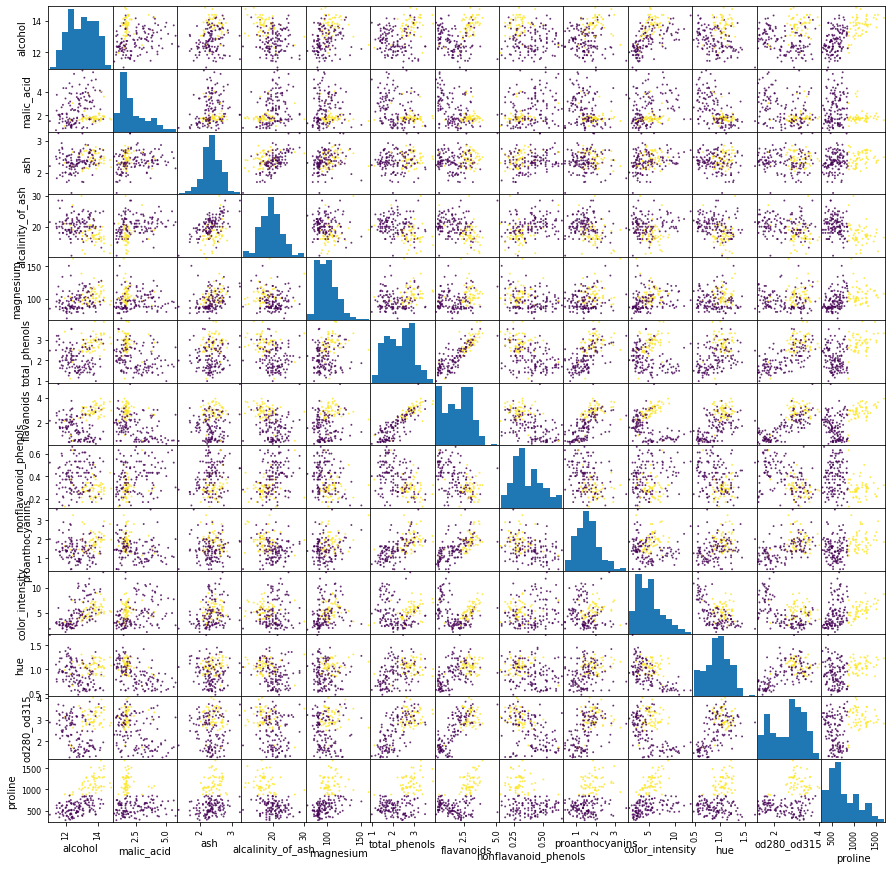

In [12]:
g = pd.plotting.scatter_matrix(wine.drop(['real_classes','kmeans1'],1),
                               figsize=(15,15),
                               marker = '.',
                               s = 15,
                               alpha = 0.8,           # We can colour each datapoint differently depending
                               c = wine['kmeans1'])   # on the flag given by our clustering solution
plt.show()

## Building our second set of K-means clusters

Maybe we should standardise our variables somehow so that the variable with the highest mean does not dominate. Let's try exactly the same process again, but first we will use a MinMax scaler to standardise our attributes so that they have the same min and max values.

In [13]:
wine.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue', 'od280_od315', 'proline',
       'real_classes', 'kmeans1'],
      dtype='object')

In [34]:
from sklearn.cluster import KMeans

## Fitting k-means clusters is simple - we only need one line of code
kmeans2 = KMeans(n_clusters=3, random_state=3).fit(wine[['alcohol','ash','magnesium','color_intensity','proline']], 1)

## The resulting kmeans1 object has centroid values...
centroids2 = kmeans2.cluster_centers_

## And it has an array of labels, one for each datapoint.
labels2 = kmeans2.labels_

## We can use these labels to create a new column in our original dataset:
wine['kmeans2'] = labels2

In [35]:
## Let's look at the centorid values again
## This time all the mean values are between 0 and 1
centroids2

array([[  13.80446809,    2.42617021,  105.5106383 ,    5.70255319,
        1195.14893617],
       [  12.51666667,    2.28855072,   92.34782609,    4.08695651,
         458.23188406],
       [  12.92983871,    2.40806452,  103.59677419,    5.65032258,
         728.33870968]])

In [36]:
## Let's look at the centorid values again using the unstandardised data - are they much different?
wine.groupby('kmeans2').mean()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280_od315,proline,real_classes,kmeans1
kmeans2,,,,,,,,,,,,,,,
0,13.804468,1.883404,2.426170,17.023404,105.510638,2.867234,3.014255,0.285319,1.910426,5.702553,1.078298,3.114043,1195.148936,0.021277,1.000000
1,12.516667,2.494203,2.288551,20.823188,92.347826,2.070725,1.758406,0.390145,1.451884,4.086957,0.941159,2.490725,458.231884,1.275362,0.000000
2,12.929839,2.504032,2.408065,19.890323,103.596774,2.111129,1.584032,0.388387,1.503387,5.650323,0.883968,2.365484,728.338710,1.258065,0.129032


In [38]:
## Has our accuracy improved? Yes!
## Now we have a cluster which correctly identifies all 59 datapoints in 'Class 1'
wine.groupby(['real_classes','kmeans2'])['real_classes'].count()

real_classes  kmeans2
0             0          46
              2          13
1             0           1
              1          50
              2          20
2             1          19
              2          29
Name: real_classes, dtype: int64

## Visualise our second clustering solution with a pair-plot

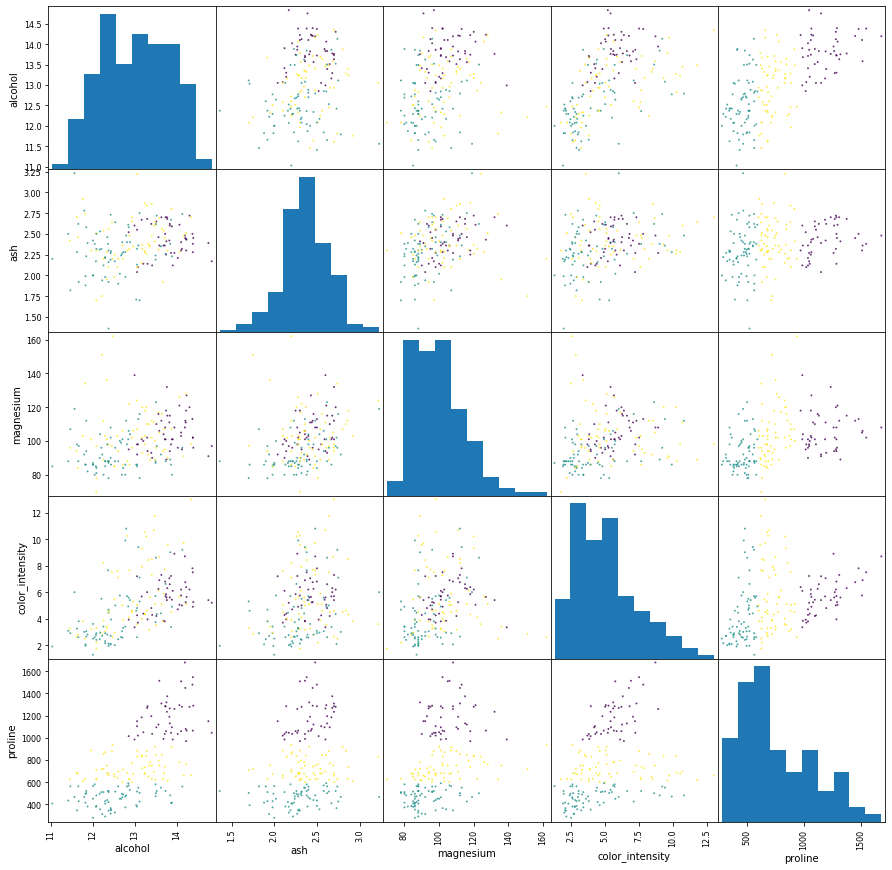

In [33]:
g = pd.plotting.scatter_matrix(wine[['alcohol','ash','magnesium','color_intensity','proline']],
                               figsize=(15,15),
                               marker = '.',
                               s = 15,
                               alpha = 0.8,           # We can colour each datapoint differently depending
                               c = wine['kmeans2'])   # on the flag given by our clustering solution
plt.show()

In [25]:
wine.groupby('kmeans2').mean()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280_od315,proline,real_classes,kmeans1
kmeans2,,,,,,,,,,,,,,,
0,12.703562,2.298356,2.257671,19.856164,87.219178,2.136438,1.829315,0.388082,1.530411,4.363973,0.956164,2.581644,596.616438,1.123288,0.123288
1,13.167468,2.460253,2.419241,19.150633,102.962025,2.363924,2.071139,0.355823,1.553038,5.547089,0.951975,2.576709,840.620253,0.873418,0.443038
2,13.327692,2.066538,2.511923,19.526923,125.115385,2.531538,2.463462,0.306538,1.875769,5.521154,0.977692,2.802308,884.038462,0.615385,0.423077


## Building our third set of K-means clusters

OK. So standardising the variables used for clustering improved our first solution. Now let's see what happens when we expand our clustering to include 3 clusters. Hopefully, we get something that matches the real classifications very closely.

In [39]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
wine_std = min_max_scaler.fit_transform(wine.drop(['real_classes','kmeans1','kmeans2'], 1))

# We now have an object called 'wine_std' which we can input into the KMeans function.

In [40]:
from sklearn.cluster import KMeans

## Fitting k-means clusters is simple - we only need one line of code
kmeans3 = KMeans(n_clusters=3, random_state=3).fit(wine_std)

centroids3 = kmeans3.cluster_centers_
labels3 = kmeans3.labels_
wine['kmeans3'] = labels3

In [41]:
## Let's look at the centorid values again
## This time all the mean values are between 0 and 1
##But now we have 3 sets of values, not 2
centroids3

array([[0.31336675, 0.23561704, 0.47304983, 0.50024546, 0.24551415,
        0.44805692, 0.38008171, 0.41868823, 0.39717591, 0.14778699,
        0.47218996, 0.58422001, 0.15637525],
       [0.70565142, 0.24842869, 0.58490401, 0.3444313 , 0.41072701,
        0.64211419, 0.55467939, 0.30034024, 0.47727155, 0.35534046,
        0.47780888, 0.69038612, 0.59389397],
       [0.54668616, 0.48440931, 0.56159636, 0.53865979, 0.31521739,
        0.2467433 , 0.10474293, 0.61425577, 0.22543521, 0.48878144,
        0.18888889, 0.15852666, 0.24911502]])

In [42]:
## Let's look at the centorid values again using the unstandardised data
wine.groupby('kmeans3').mean()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280_od315,proline,real_classes,kmeans1,kmeans2
kmeans3,,,,,,,,,,,,,,,,
0,12.220794,1.932222,2.244603,20.304762,92.587302,2.279365,2.141587,0.351905,1.669048,3.012063,1.060794,2.864921,497.238095,1.000000,0.015873,1.253968
1,13.711475,1.997049,2.453770,17.281967,107.786885,2.842131,2.969180,0.289180,1.922951,5.444590,1.067705,3.154754,1110.639344,0.032787,0.852459,0.459016
2,13.107407,3.191111,2.410185,21.050000,99.000000,1.695556,0.836481,0.455556,1.124630,7.008519,0.712333,1.702778,627.259259,1.888889,0.037037,1.592593


In [43]:
## How accurate is our solution?
## Pretty good - only 9 datapoints fall outside a 1:1 mapping between our solution and the real classifications
wine.groupby(['real_classes','kmeans3'])['real_classes'].count()

real_classes  kmeans3
0             1          59
1             0          63
              1           2
              2           6
2             2          48
Name: real_classes, dtype: int64

## Visualise our third clustering solution with a pair-plot

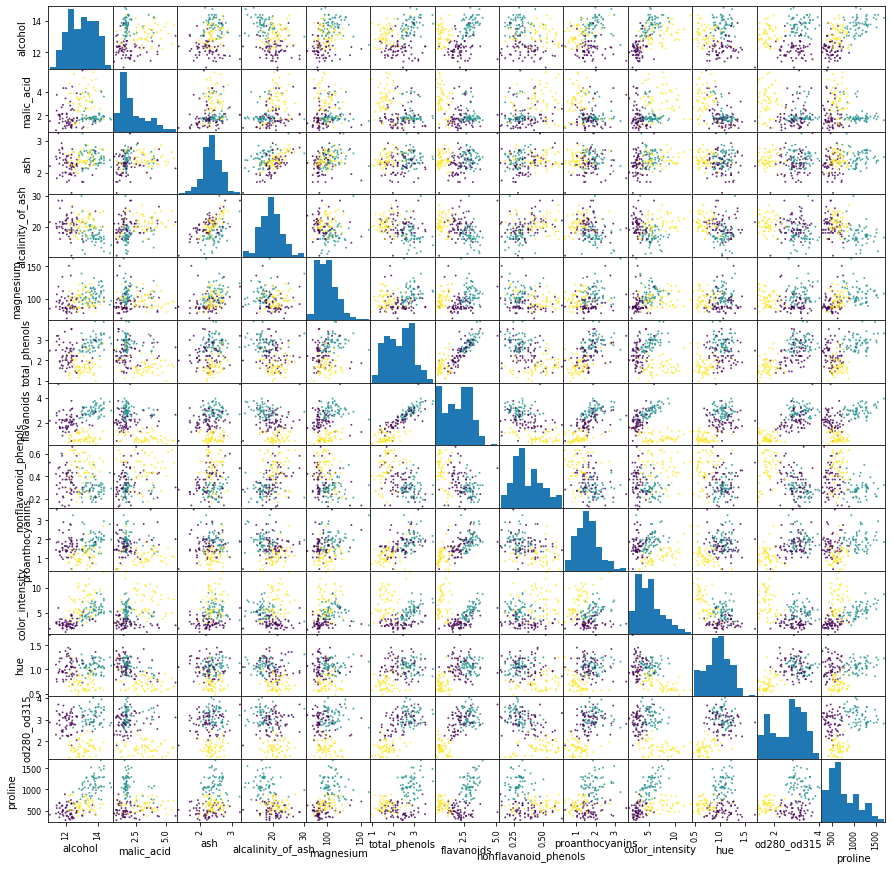

In [44]:
g = pd.plotting.scatter_matrix(wine.drop(['real_classes','kmeans1','kmeans2','kmeans3'],1),
                               figsize=(15,15),
                               marker = '.',
                               s = 15,
                               alpha = 0.8,           # We can colour each datapoint differently depending
                               c = wine['kmeans3'])   # on the flag given by our clustering solution
plt.show()

## Is there a way to automatically identify the right number of clusters

No.

However, we can get a rough guide to which values for k (the number of cluster) provide the best statistical solutions. We plot a WSS score for different values of k and try to identify the 'elbow' in the line. This is where the statistical improvement does not increase much when we increase the value of k.

In [45]:
## We use a for loop to try various different values for k
## For each k, we calculate the 'inertia' and append it to a list object
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k, random_state=3).fit(wine_std)
    Sum_of_squared_distances.append(km.inertia_)

In [46]:
## We now have a list of 'inertia' values which decrease as k increases
Sum_of_squared_distances

[95.5995377847106,
 64.53766702389431,
 48.95403581962662,
 44.79008357753514,
 42.188262596242325,
 39.790789819113655,
 37.805001793242255,
 36.50755804523921,
 34.820261950314,
 33.11828870267879,
 31.53225694482562,
 30.322975550333094,
 29.854584748817764,
 28.556693401181086]

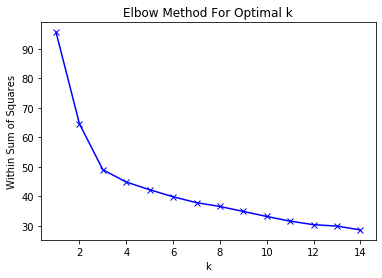

In [47]:
## Now we can plot to help us identify the 'optimal' value for k
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Within Sum of Squares')
plt.title('Elbow Method For Optimal k')
plt.show()